Notebook to implement a logistic regression model using sklearn and apply it to a CSV dataset of anonymised grades for two University modules ('Module 1' and 'Module 2', plus other associated categorical data on whether each student was admitted to a follow-on module with Module 1 and Module 2 as pre-requisites. Predictions are then made using a testing dataset and performance is assessed.

    -    Aidan Burt, 31st April 2023


In [49]:
# Load the dataset 'marks.csv' using Pandas

import pandas as pd
df = pd.read_csv('marks.csv')

# print summary of data
print(df.head)

<bound method NDFrame.head of      Module 1  Module 2  Work Experience  Admitted
0          94        82                5         1
1          69        67                2         0
2          85        67                2         0
3          78        67                3         0
4          91        92                5         1
..        ...       ...              ...       ...
995        84        92                4         1
996        74        67                4         0
997       100       100                3         1
998        75        57                3         0
999        74        82                1         0

[1000 rows x 4 columns]>


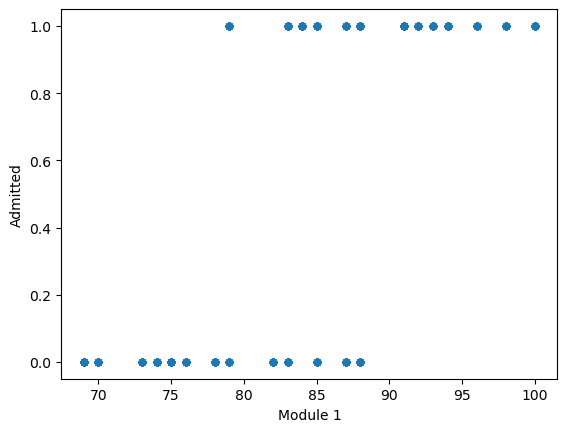

In [50]:
# Make a scatter plot of students admitted as a function of marks achieved
# for Module 1

ax = df.plot.scatter(x='Module 1',y='Admitted')


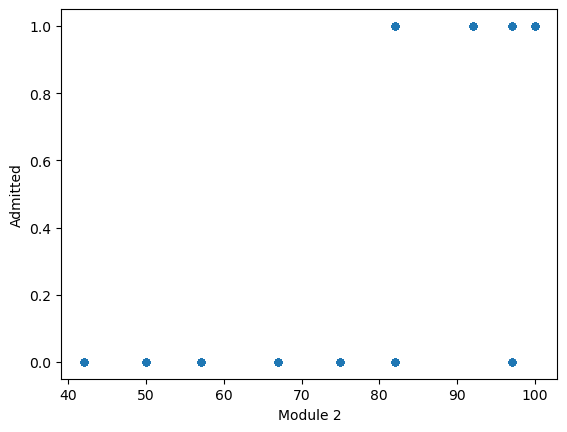

In [51]:
# Make a scatter plot of students admitted as a function of marks achieved
# for Module 2

ax2 = df.plot.scatter(x='Module 2',y='Admitted')


In [52]:
# create sub-dataframes for X=[Module 1, Module 2] and y=Admitted

X = df[['Module 1','Module 2']]
y = df['Admitted']

In [53]:
# import train_test_split and do a 60/40 split

import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.40)


In [54]:
# import Logistic Regression and fit to training dataset
import sklearn.linear_model

regr = sklearn.linear_model.LogisticRegression()
regr.fit(X_train, y_train)


LogisticRegression()

In [55]:
# predict the categorical data for Admission column based on Module 1 & 2 score

y_pred = regr.predict(X_test)


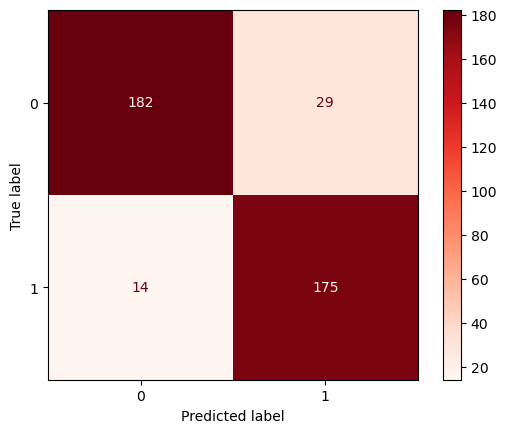

In [56]:
# plot confusion matrix to assess logistic regression performance

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(regr, X_test, y_test, cmap='Reds')


In [57]:
# assess classifier performance using R2 score, accuracy, precision, 
# recall and F1 score

# import the additional functionality from sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# R2 score...
R2 = regr.score(X_test,y_test)
print('Logistic classifier R2 score is ' + str(R2))

# accuracy (should be identical to R2 score)...
regr_accuracy = accuracy_score(y_test,y_pred)
print('Logistic classifier accuracy is ' + str(regr_accuracy))

# precision...
regr_precision = precision_score(y_test,y_pred)
print('Logistic classifier precision is ' + str(regr_precision))

# recall...
regr_recall = recall_score(y_test,y_pred)
print('Logistic classifier recall is ' + str(regr_recall))

# F1 score...
regr_F1 = f1_score(y_test,y_pred)
print('Logistic classifier F1 score is ' + str(regr_F1))

Logistic classifier R2 score is 0.8925
Logistic classifier accuracy is 0.8925
Logistic classifier precision is 0.8578431372549019
Logistic classifier recall is 0.9259259259259259
Logistic classifier F1 score is 0.8905852417302799
